In [13]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [14]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Logistic regression on mtcars

In [16]:
df = pd.read_csv("Sessionized_SquarePanda.csv",parse_dates=True,error_bad_lines=False)

#cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
df.head()

,childid,session_id,createdat,gamename,duration,gender,age,wordtype,platform,gamescore,minutes_since_last_interval,new_event_boundary
0,1004,0,2016-11-07 20:34:00,Lagoon,47,F,19,WORD,Not Known,1,NaN,0
1,1005,0,2016-11-07 20:52:00,Lagoon,7,F,7,WORD,Not Known,1,NaN,0
2,1005,0,2016-11-07 20:53:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
3,1005,0,2016-11-07 20:54:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
4,1010,0,2016-11-08 00:45:00,Bubbles,70,F,4,WORD,Not Known,1,NaN,0


In [149]:
df['year'] = pd.to_datetime(df['createdat']).dt.year
df['weeknumber'] = pd.to_datetime(df['createdat']).dt.week
df = df.loc[df['year']==2017]


cars_data = df.ix[:,(0,13)].values

cars_data_names = ['childid','weeknumber']
print cars_data
y = df.ix[:,13].values


[[1010    1]
 [1010    2]
 [1010    2]
 ..., 
 [ 999    6]
 [ 999    6]
 [ 999    6]]


/home/miti/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


#### Checking for independence between features

In [150]:
sb.regplot(x='childid', y='weeknumber', data=cars_data, scatter=True)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [132]:
drat = df['childid']
carb = df['weeknumber']

spearmanr_coefficient, p_value =  spearmanr(drat, carb)
print 'Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficient 0.631


#### Checking for missing values

In [123]:
df.isnull().sum()

childid                           0
session_id                        0
createdat                         0
gamename                          0
duration                          0
gender                            0
age                               0
wordtype                          0
platform                          0
gamescore                         0
minutes_since_last_interval    2025
new_event_boundary                0
dayofweek                         0
weeknumber                        0
year                              0
dtype: int64

#### Checking that your target is binary or ordinal

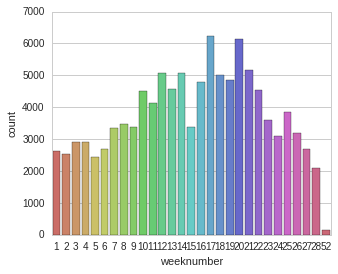

In [133]:
sb.countplot(x='weeknumber', data=df, palette='hls')

#### Checking that your dataset size is sufficient

In [134]:
print df.weeknumber.max()
print df.weeknumber.min()

52
1


#### Deploying and evaluating your model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55fac39d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f55fa71d4d0>]], dtype=object)

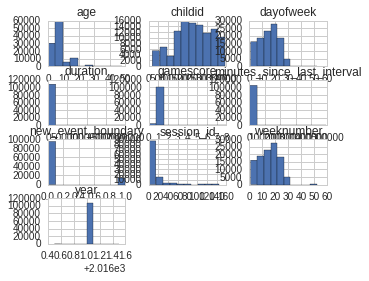

In [135]:
X = scale(cars_data)
df.hist()

In [136]:
LogReg = LogisticRegression()

LogReg.fit(X,y)
print LogReg.score(X,y)

0.258352611545


In [138]:
y_pred = LogReg.predict(X)

from sklearn.metrics import classification_report
print(classification_report(y, y_pred))


             precision    recall  f1-score   support

          1       1.00      1.00      1.00      2615
          2       1.00      0.81      0.90      2533
          3       0.77      1.00      0.87      2909
          4       1.00      0.77      0.87      2902
          5       0.00      0.00      0.00      2431
          6       0.00      0.00      0.00      2676
          7       0.20      0.15      0.17      3360
          8       0.00      0.00      0.00      3468
          9       0.00      0.00      0.00      3369
         10       0.00      0.00      0.00      4507
         11       0.00      0.00      0.00      4146
         12       0.08      0.19      0.12      5077
         13       0.00      0.00      0.00      4583
         14       0.20      0.56      0.29      5075
         15       0.00      0.00      0.00      3384
         16       0.00      0.00      0.00      4803
         17       0.20      0.69      0.31      6243
         18       0.00      0.00      0.00   

In [139]:
np.savetxt('test.csv',y_pred,delimiter=',')

In [140]:
np.genfromtxt('test.csv', delimiter=',')

array([ 1.,  2.,  2., ...,  7.,  7.,  7.])